In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import datetime
from tqdm import tqdm, trange
tqdm.pandas()

rides = pd.read_csv('../data/rideshare_kaggle.csv')
locations = {'Haymarket Square':0, 'Back Bay':1, 'North End':2,
             'North Station':3,'Beacon Hill':4, 'Boston University':5,
             'Fenway':6, 'South Station':7, 'Theatre District':8, 'West End':9,
             'Financial District':10, 'Northeastern University':11}

C:\Users\evanj\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
rides.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [3]:
rides['weekday'] = rides.progress_apply(lambda row: datetime.datetime.strptime(row['datetime'], '%Y-%m-%d %H:%M:%S').weekday(), axis=1)
rides['date'] = rides.progress_apply(lambda row: datetime.datetime.strptime(row['datetime'], '%Y-%m-%d %H:%M:%S').date(), axis=1)

100%|███████████████████████████████████████████████████████████████████████| 693071/693071 [00:15<00:00, 44140.25it/s]


In [4]:
sources = rides.source.to_numpy()
destinations = rides.destination.to_numpy()
ride_corr = np.zeros((len(locations),len(locations)))
for source in tqdm(list(locations.keys())):
    for destination in list(locations.keys()):
        source_idx = locations[source]
        destination_idx = locations[destination]
        ride_corr[source_idx,destination_idx] = len(np.intersect1d(np.where(sources==source),np.where(destinations==destination)))

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.75it/s]


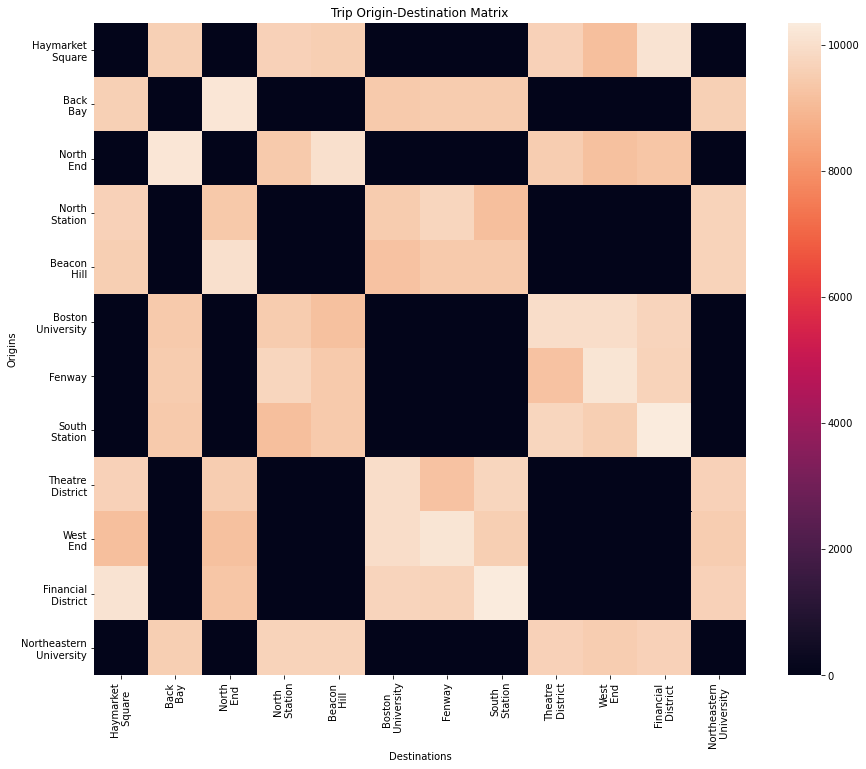

In [5]:
fig,ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(ride_corr, square=True)
ax.set_title('Trip Origin-Destination Matrix')
ax.set_ylabel('Origins')
labels = [s.replace(' ','\n ') for s in list(locations.keys())]
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel('Destinations')
ax.set_xticklabels(labels, rotation='vertical')
plt.savefig('../figures/scooter_od_matrix.png',format='png')
plt.show()

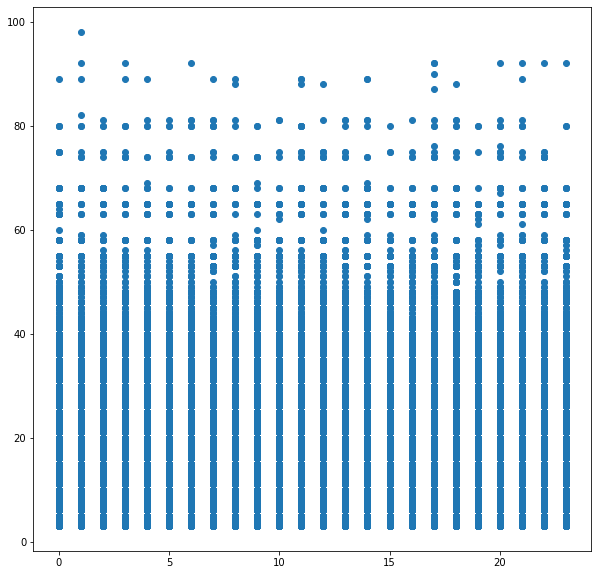

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(np.ceil(rides['hour']),np.ceil(rides['price']))
plt.show()

In [7]:
new_rides = rides[['hour','cab_type','price','distance','date']].dropna(subset = ['price']).reset_index()
new_rides['distance'] = new_rides.progress_apply(lambda row: math.ceil(row['distance']), axis=1)
new_rides['price'] = new_rides.progress_apply(lambda row: 5*math.floor(row['price']/5), axis=1)

100%|██████████████████████████████████████████████████████████████████████| 637976/637976 [00:04<00:00, 131884.55it/s]


In [8]:
cab_types_ = new_rides.cab_type.unique()
distances_ = new_rides.distance.unique()
hours_ = np.array([17,18,19])  # new_rides.hour.unique()
prices_ = np.array([10])  # np.array([5*(i+1) for i in range(10)])  # new_rides.price.unique()
dates_ = new_rides.date.unique()

g = np.zeros((len(cab_types_),len(prices_),len(hours_),len(distances_),len(dates_)))

for i in range(len(cab_types_)):
    for j in range(len(prices_)):
        for k in trange(len(hours_)):
            for m in range(len(distances_)):
                for n in range(len(dates_)):
                    g[i,j,k,m,n] = len(new_rides[(new_rides['cab_type']==cab_types_[i])
                                                &(new_rides['price']==prices_[j])
                                                &(new_rides['hour']==hours_[k])
                                                &(new_rides['distance']==distances_[m])
                                                &(new_rides['date']==dates_[n])])

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:27<00:00,  9.10s/it]


In [9]:
g_L = g[np.where(cab_types_=='Lyft'),:,np.where(hours_==17),np.where(distances_==2),:]

In [10]:
g_U = g[np.where(cab_types_=='Uber'),:,np.where(hours_==17),np.where(distances_==2),:]

In [11]:
prices_

array([10])

In [12]:
new_rides.price

0          5
1         10
2          5
3         25
4          5
          ..
637971     5
637972    10
637973     5
637974    25
637975    10
Name: price, Length: 637976, dtype: int64

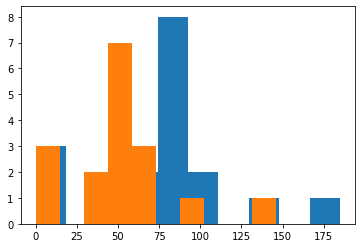

In [13]:
plt.figure()
plt.hist(np.squeeze(g_L))
plt.hist(np.squeeze(g_U))
plt.show()

In [14]:
a = np.abs(np.random.normal(size=(10,1)))
np.random.poisson(lam=a)

array([[0],
       [0],
       [1],
       [3],
       [0],
       [0],
       [0],
       [1],
       [1],
       [3]])

In [15]:
a = np.array([5*(i) for i in range(10)])
np.diag(a)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 45]])

In [16]:
np.append(np.zeros((10,1)),1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [17]:
np.random.poisson(0)

0

In [18]:
a.shape

(10,)